In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as opt
import time

In [2]:
print(torch.cuda.is_available())
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device ='cpu'

False


In [3]:
data = pd.read_csv('cancer.csv')
data.head()

,5,1,1.1,1.2,2,1.3,3,1.4,1.5,0
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1


In [4]:
x=torch.tensor(data.iloc[:500,:9].values, dtype=torch.float32)
t=torch.tensor(data.iloc[:500,9:].values, dtype=torch.float32)
x_test=torch.tensor(data.iloc[500:,:9].values, dtype=torch.float32)
t_test=torch.tensor(data.iloc[500:,9:].values, dtype=torch.float32)

In [5]:
input_units=9
hidden_units=500
output_units=1
epochs = 1000

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(9,500)
        self.act = nn.Sigmoid()
        self.lin2 = nn.Linear(500,1)

    def forward(self, x):
        x = self.lin1(x)
        x = self.act(x)
        x = self.lin2(x)
        x = self.act(x)

        return x

In [7]:
model = Net()
loss_funct=nn.MSELoss()
optimizer= opt.Adam(model.parameters(), lr=0.01)

In [8]:
model = model.to(device)
x = x.to(device)
t = t.to(device)
x_test = x_test.to(device)
t_test = t_test.to(device)

In [9]:
def pred_curv(x_test):
    t_pred = model(x_test)
    t_pred[t_pred>=0.5]=1
    t_pred[t_pred<0.5]=0
    evalu=torch.eq(t_test,t_pred)
    positive = torch.count_nonzero(evalu == True)
    negative = torch.count_nonzero(evalu == False)

    return 100*positive/(positive+negative)

In [10]:
start_time = time.time()
losses=[]
pc=[]


PATH = "model.pt"



for i in range (epochs):
  y_pred=model(x)
  loss = loss_funct(y_pred,t)
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()

  optimizer.step()
  if i%10 ==0:
    print(i,loss.item())
    pc.append(pred_curv(x_test))
    
    torch.save({
            'epoch': i,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, PATH)


0 0.23807428777217865
10 0.04195329174399376
20 0.031832825392484665
30 0.027070609852671623
40 0.02594441920518875
50 0.024519894272089005
60 0.023808754980564117
70 0.02315874770283699
80 0.02259283885359764
90 0.022080613300204277
100 0.021605277433991432
110 0.021157847717404366
120 0.020729534327983856
130 0.02030935510993004
140 0.019886251538991928
150 0.019452234730124474
160 0.01899563893675804
170 0.018504703417420387
180 0.017976365983486176
190 0.017410077154636383
200 0.01681513339281082
210 0.01619241200387478
220 0.015534124337136745
230 0.014834116213023663
240 0.01410584431141615
250 0.013372556306421757
260 0.012653835117816925
270 0.0119647067040205
280 0.011313533410429955
290 0.010709269903600216
300 0.010158690623939037
310 0.009664865210652351
320 0.00922754779458046
330 0.008842883631587029
340 0.008505226112902164
350 0.008207960054278374
360 0.007944155484437943
370 0.007707132492214441
380 0.0074900733307003975
390 0.007284380495548248
400 0.00708254612982273

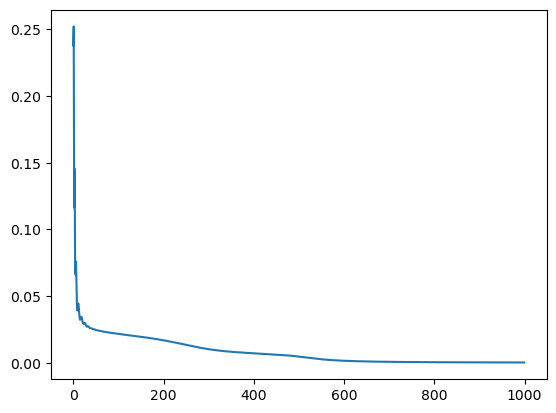

In [11]:
plt.plot(range(0,epochs),losses)


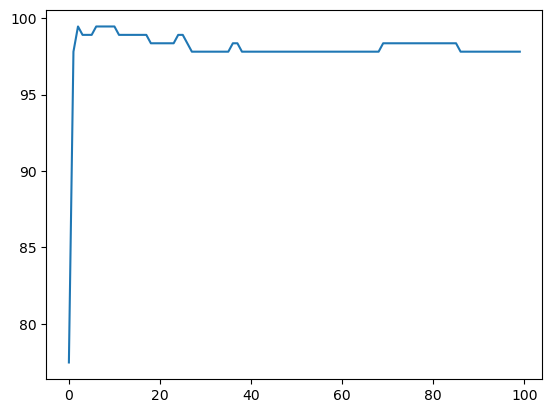

In [12]:
plt.plot(pc)

In [13]:
execution_time = (time.time() - start_time)
print('Execution time in seconds: ' + str(execution_time))

Execution time in seconds: 15.108816862106323


In [18]:
model2 = Net()
optimizer2= opt.Adam(model2.parameters(), lr=0.01)

checkpoint = torch.load(PATH)
model2.load_state_dict(checkpoint['model_state_dict'])
optimizer2.load_state_dict(checkpoint['optimizer_state_dict'])
i = checkpoint['epoch']
loss = checkpoint['loss']

#model.eval()
# - or -
model2.train()


Net(
  (lin1): Linear(in_features=9, out_features=500, bias=True)
  (act): Sigmoid()
  (lin2): Linear(in_features=500, out_features=1, bias=True)
)

In [19]:
start_time = time.time()
losses=[]
pc=[]
for i in range (epochs):
  y_pred= model2(x)
  loss = loss_funct(y_pred,t)
  losses.append(loss.item())
  optimizer2.zero_grad()
  loss.backward()

  optimizer2.step()
  if i%10 ==0:
    print(i,loss.item())
    pc.append(pred_curv(x_test))

    #torch.save(model.state_dict(), 'modelc.pth')
    #torch.save(optimizer.state_dict(), 'optimizerc.pth')

0 0.00019559211796149611
10 0.00018981263565365225
20 0.00018429351621307433
30 0.00017901969840750098
40 0.0001739753788569942
50 0.0001691478828433901
60 0.00016452401177957654
70 0.0001600925315869972
80 0.00015584263019263744
90 0.00015176431043073535
100 0.00014784828817937523
110 0.00014408606512006372
120 0.0001404694194206968
130 0.00013699087139684707
140 0.00013364345068112016
150 0.00013042052160017192
160 0.00012731575407087803
170 0.0001243236183654517
180 0.00012143862113589421
190 0.00011865521810250357
200 0.00011596926196943969
210 0.00011337576142977923
220 0.00011087060556747019
230 0.00010844998178072274
240 0.00010610971366986632
250 0.00010384648339822888
260 0.00010165677667828277
270 9.95375303318724e-05
280 9.748568118084222e-05
290 9.549826791044325e-05
300 9.357249655295163e-05
310 9.170607518171892e-05
320 8.989631169242784e-05
330 8.814097964204848e-05
340 8.643791079521179e-05
350 8.478487870888785e-05
360 8.31799115985632e-05
370 8.162133599398658e-05
380

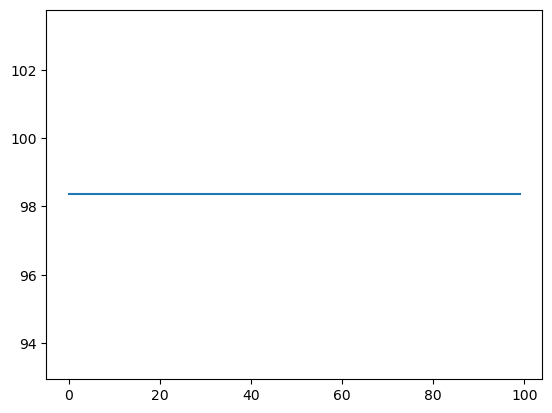

In [20]:
plt.plot(pc)